## Wave Period Analysis
- Henrique Pereira
- 2018/10/05

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import mlab
import cv2
import scipy.io as sio

### Compare brightness and wavestaffs time series
- Analyse the harmonic frequencies in both 

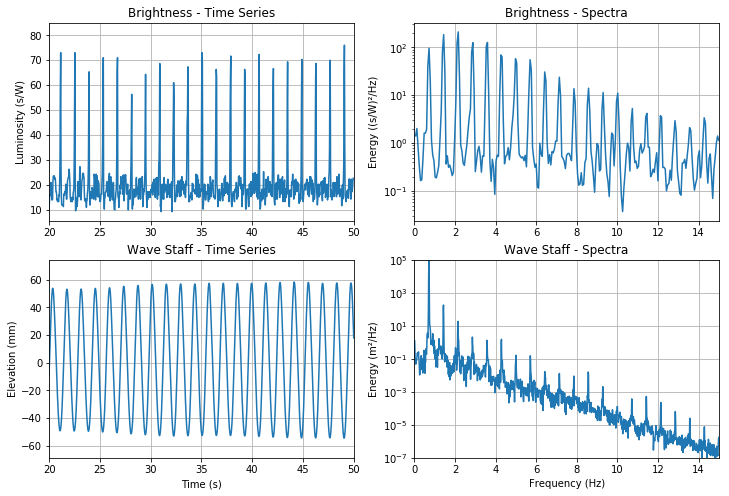

In [96]:
# read brightness
dfb = pd.read_csv('../out/brightness.csv', index_col='time')

# read wavestaffs
df1 = sio.loadmat(os.environ['HOME'] + 
                  '/Dropbox/ondometro/data/laboceano/wavestaffs/T100_570003.gin.mat')

# convert to dataframe
dfw = {}
for w in ['tempo','WP_01']:
    dfw[w] = df1[w][:,0]
dfw = pd.DataFrame(dfw, index=df1['tempo'])
dfw = dfw.set_index('tempo')

# spectra parameters

# sample frequency
fs = {'bri': 1./(dfb.index[2] - dfb.index[1]),
      'wav': 1./(dfw.index[2] - dfw.index[1])}

nfft = {'bri': int(dfb.shape[0]/2),
        'wav': int(dfw.shape[0]/2)}

specb = mlab.psd(dfb.iloc[:,0].values, NFFT=nfft['bri'], Fs=fs['bri'],
                 detrend=mlab.detrend_mean, window=mlab.window_hanning,noverlap=nfft['bri']/2)

specw = mlab.psd(dfw.iloc[:,0].values, NFFT=nfft['wav'], Fs=fs['wav'],
                 detrend=mlab.detrend_mean, window=mlab.window_hanning,noverlap=nfft['wav']/2)

# frequencia e energia
fb, spb = specb[1][1:],specb[0][1:]
fw, spw = specw[1][1:],specw[0][1:]

# plot time series and sprectrum
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(dfb.index, dfb.iloc[:,0])
plt.ylabel('Luminosity (s/W)')
plt.xlim(20,50)
plt.title('Brightness - Time Series')
plt.grid()

plt.subplot(222)
plt.semilogy(fb, spb)
# plt.plot([1/1.4,1/1.4], [0,140],'k--')
plt.ylabel('Energy ((s/W)²/Hz)')
plt.title('Brightness - Spectra')
plt.xlim(0, 15)
# plt.ylim(0,140)
plt.grid()

plt.subplot(223)
plt.plot(dfw.index, dfw.iloc[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Elevation (mm)')
plt.title('Wave Staff - Time Series')
plt.grid()
plt.xlim(20,50)

plt.subplot(224)
plt.semilogy(fw, spw)
# plt.plot([1/1.4,1/1.4], [0,250],'k--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy (m²/Hz)')
plt.title('Wave Staff - Spectra')
plt.xlim(0, 15)
plt.ylim(10**-7, 10**5)
plt.grid()

plt.show()

### Plot espectros com e sem reflexo

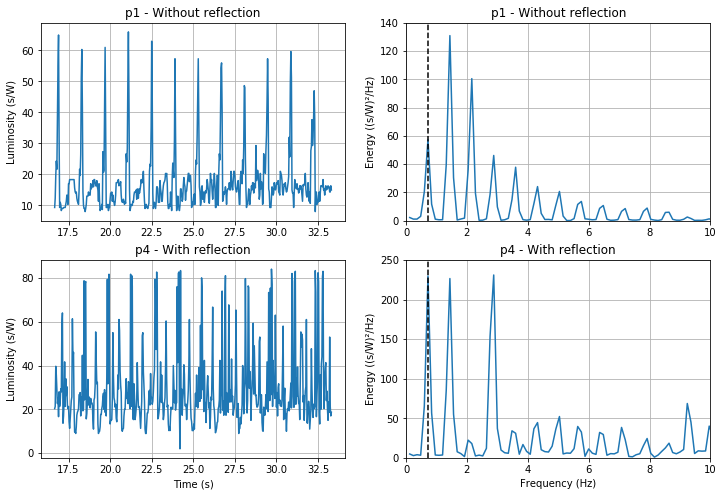

In [21]:
# read data pont
# p1 - without noise
# p4 - with noise

df1 = pd.read_csv('../out/brilho_p1.csv', index_col='time')
df4 = pd.read_csv('../out/brilho_p4.csv', index_col='time')

# pega o tempo especifico de onde a onda ja chegou

# df1 = df1.iloc[40:]
# df4 = df4.iloc[40:]

# calculo do espectro
nfft = int(len(df1)/2)
fs = 30

spec1 = mlab.psd(df1['p1'],NFFT=nfft,Fs=fs,detrend=mlab.detrend_mean,
              window=mlab.window_hanning,noverlap=nfft/2)

spec4 = mlab.psd(df4['p4'],NFFT=nfft,Fs=fs,detrend=mlab.detrend_mean,
              window=mlab.window_hanning,noverlap=nfft/2)

# frequencia e energia
f, sp1 = spec1[1][1:],spec1[0][1:]
f, sp4 = spec4[1][1:],spec4[0][1:]

# plot time series and sprectrum

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(df1.index, df1['p1'])
# plt.xlabel('Time (s)')
plt.ylabel('Luminosity (s/W)')
# plt.xlim(40,60)
plt.title('p1 - Without reflection')
plt.grid()

plt.subplot(222)
plt.plot(f, sp1)
plt.plot([1/1.4,1/1.4], [0,140],'k--')
plt.ylabel('Energy ((s/W)²/Hz)')
plt.title('p1 - Without reflection')
plt.xlim(0, 10)
plt.ylim(0,140)
plt.grid()

plt.subplot(223)
plt.plot(df4.index, df4['p4'])
plt.xlabel('Time (s)')
plt.ylabel('Luminosity (s/W)')
plt.grid()
# plt.xlim(40,60)
plt.title('p4 - With reflection')

plt.subplot(224)
plt.plot(f, sp4)
plt.plot([1/1.4,1/1.4], [0,250],'k--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy ((s/W)²/Hz)')
plt.title('p4 - With reflection')
plt.xlim(0, 10)
plt.ylim(0, 250)
plt.grid()


plt.show()